# Logistic Regression

You will find this tutorial series much better if you follow along [This](https://www.coursera.org/learn/machine-learning) course. It's free and has very good explantion of algos. My series will be only about it's implementation in Python.

I repeat **Concepts and Algos** will **not** be taught in this series

# Importing Required Modules

Check out the 1st part of this seeries in this repository for this prerequisites for this course

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Getting things Ready

## Making the Data

We will require a true or false based on a single parameter sort of data. I planned to make it by myself as I couldn't find a suitable one on the internet.


In [66]:
n_samples = 100     # Number of data points
np.random.seed(0)   # To generate the same random points everytime. Look at the docs for more info
X = np.random.normal(size=n_samples)         # Random numbers from a gaussian distrbution
y = (X > 0).astype(np.float)                 # Classifying as 1 or 0
X[X > 0] *= 4                                # Making some noise  
X += .1 * np.random.normal(size=n_samples)   # The multiplication factor decides the level of noise generated
X = X[:, np.newaxis]

## Plotting the Data

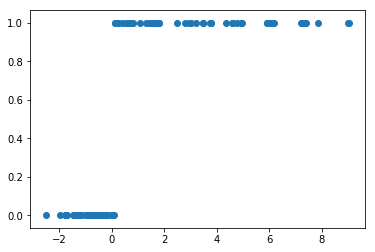

In [67]:
plt.scatter(X,y)

# Training the Model

Check out [The Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for info on the types of solvers available

In [69]:
clf = LogisticRegression(solver = 'liblinear')
clf.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

## Accuracy Rating

In [61]:
clf.score(X, y)

0.9852

## Plotting as a Sigmoidal Curve

In [62]:
X_test = np.linspace(-5, 10, 300)     # Generating points between the min and the max 'x' of the data points 
                                      # to get us a sigmoidal function

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


loss = sigmoid(X_test * clf.coef_ + clf.intercept_).ravel()

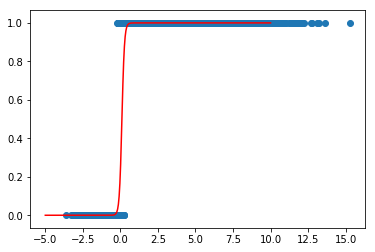

In [63]:

plt.scatter(X, y)

plt.plot(X_test, loss, 'r')

# Comparision with Linear Regression

0.5236674980944422

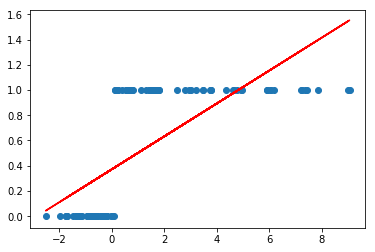

In [75]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
plt.scatter(X, y)
plt.plot(X, reg.predict(X), color = 'r')
print(f'reg.score(X, y)